### Clustering model for descriptive analysis of mobility patterns

In [50]:
#import packages
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [3]:
#set working directory
os.chdir('/projects/mpi/shared/Data')

In [4]:
#import mobility data and shapefiles

#import census tract file
shapes = gpd.read_file('all_cts.shp')

#import trip files
nyc = pd.read_csv('nyc_clean.csv')
chic = pd.read_csv('chic_clean.csv')
sf = pd.read_csv('sf_clean.csv')
la = pd.read_csv('la_clean.csv')

### Pre-processing

In [35]:
#define function restructure data 
def pre_process(df,col1,col2,col3):
    '''function to prepare data for clustering model'''
    
    df_agg = pd.DataFrame(df.groupby([col1,col2])[col3].sum())
    df_agg.reset_index(inplace=True)
    
    df_agg = pd.pivot_table(df_agg, values=col3, index=[col1], 
                         columns=[col2],fill_value=0,aggfunc=np.sum)
    
    return df_agg

In [38]:
#apply pre-process function to raw data for dest cluster input data
nyc_dest_agg = pre_process(nyc,'dest_ct','origin_ct','od_counts')
chic_dest_agg = pre_process(chic,'dest_ct','origin_ct','od_counts')
sf_dest_agg = pre_process(sf,'dest_ct','origin_ct','od_counts')
la_dest_agg = pre_process(la,'dest_ct','origin_ct','od_counts')

#apply pre-process function to raw data for origin cluster input data
nyc_origin_agg = pre_process(nyc,'origin_ct','dest_ct','od_counts')
chic_origin_agg = pre_process(chic,'origin_ct','dest_ct','od_counts')
sf_origin_agg = pre_process(sf,'origin_ct','dest_ct','od_counts')
la_origin_agg = pre_process(la,'origin_ct','dest_ct','od_counts')

### Cluster Modeling and Selection

In [48]:
#initialize function to calculate silhouette scores

def silhouette_testing(df):
    '''function to loop through silhouette scores for different cluster groups'''
    #test kmeans model across k range
    cluster_test = [i for i in range(2,11)] #cluster range to iterate over
    scores = []
    elbows = []

    for i in cluster_test:
        cluster_mod = KMeans(n_clusters=i,random_state=13).fit(df)
        silhouette_scores = silhouette_score(df,cluster_mod.labels_)
        
        print("For n_clusters = {},".format(i)+" the average silhouette_score is : {}" \
              .format(silhouette_scores))
        scores.append(silhouette_scores)

        elbow = sum(np.min(cdist(df, cluster_mod.cluster_centers_, 
                            'euclidean'), axis=1)) / df.shape[0]
        elbows.append(elbow)
    
    return scores, elbows

In [51]:
#generate scores and elbows for NYC
nyc_scores, nyc_elbows = silhouette_testing(nyc_origin_agg)

For n_clusters = 2, the average silhouette_score is : 0.7460387457012758
For n_clusters = 3, the average silhouette_score is : 0.7213831183454353
For n_clusters = 4, the average silhouette_score is : 0.639719238831703
For n_clusters = 5, the average silhouette_score is : 0.6094164462269663
For n_clusters = 6, the average silhouette_score is : 0.3612151222717848
For n_clusters = 7, the average silhouette_score is : 0.5120680778705167
For n_clusters = 8, the average silhouette_score is : 0.5412644087546137
For n_clusters = 9, the average silhouette_score is : 0.5244700926660834
For n_clusters = 10, the average silhouette_score is : 0.6496089609216169


In [52]:
#generate scores and elbows for Chicago
chic_scores, chic_elbows = silhouette_testing(chic_origin_agg)

For n_clusters = 2, the average silhouette_score is : 0.9467859292283822
For n_clusters = 3, the average silhouette_score is : 0.7242426239956452
For n_clusters = 4, the average silhouette_score is : 0.805360821026236
For n_clusters = 5, the average silhouette_score is : 0.48155241626204415
For n_clusters = 6, the average silhouette_score is : 0.4133991570827677
For n_clusters = 7, the average silhouette_score is : 0.4152826990980143
For n_clusters = 8, the average silhouette_score is : 0.28342020263622525
For n_clusters = 9, the average silhouette_score is : 0.3146535259686396
For n_clusters = 10, the average silhouette_score is : 0.22044010055335847


In [55]:
#generate scores and elbows for SF
sf_scores, sf_elbows = silhouette_testing(sf_origin_agg)

For n_clusters = 2, the average silhouette_score is : 0.9310247709249464
For n_clusters = 3, the average silhouette_score is : 0.8920130941498705
For n_clusters = 4, the average silhouette_score is : 0.7116039216627463
For n_clusters = 5, the average silhouette_score is : 0.7106862329664636
For n_clusters = 6, the average silhouette_score is : 0.734265678036635
For n_clusters = 7, the average silhouette_score is : 0.7339152220764862
For n_clusters = 8, the average silhouette_score is : 0.31853203033220173
For n_clusters = 9, the average silhouette_score is : 0.29825800549675263
For n_clusters = 10, the average silhouette_score is : 0.31804479544220005


In [56]:
#generate scores and elbows for LA
la_scores, la_elbows = silhouette_testing(la_origin_agg)

For n_clusters = 2, the average silhouette_score is : 0.9693544249394599
For n_clusters = 3, the average silhouette_score is : 0.7764027348737813
For n_clusters = 4, the average silhouette_score is : 0.6918948111773355
For n_clusters = 5, the average silhouette_score is : 0.7262329984932886
For n_clusters = 6, the average silhouette_score is : 0.35129715160595526
For n_clusters = 7, the average silhouette_score is : 0.38777833292842157
For n_clusters = 8, the average silhouette_score is : 0.37376811149714817
For n_clusters = 9, the average silhouette_score is : 0.40299999609922055
For n_clusters = 10, the average silhouette_score is : 0.055716209666726586


In [75]:
#list for plotting
cluster_numbers = ['1','2','3','4','5','6','7','8','9','10']

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

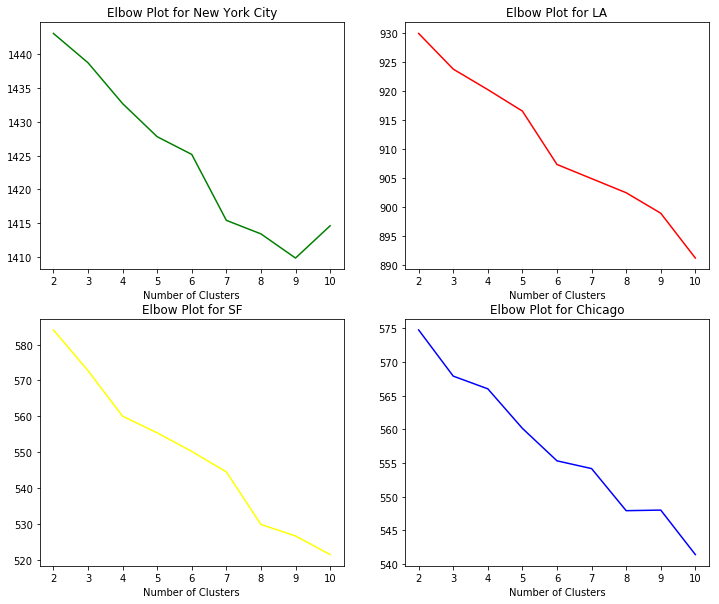

In [76]:
#plot elbow scores
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.plot(nyc_elbows,color='green')
ax1.set_title("Elbow Plot for New York City")
ax1.set_xlabel("Number of Clusters")
ax1.set_xticklabels(labels=cluster_numbers)

ax2 = fig.add_subplot(222)
ax2.plot(la_elbows,color='red')
ax2.set_title("Elbow Plot for LA")
ax2.set_xlabel("Number of Clusters")
ax2.set_xticklabels(labels=cluster_numbers)

ax3 = fig.add_subplot(223)
ax3.plot(sf_elbows,color='yellow')
ax3.set_title("Elbow Plot for SF")
ax3.set_xlabel("Number of Clusters")
ax3.set_xticklabels(labels=cluster_numbers)

ax4 = fig.add_subplot(224)
ax4.plot(chic_elbows,color='blue')
ax4.set_title("Elbow Plot for Chicago")
ax4.set_xlabel("Number of Clusters")
ax4.set_xticklabels(labels=cluster_numbers)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

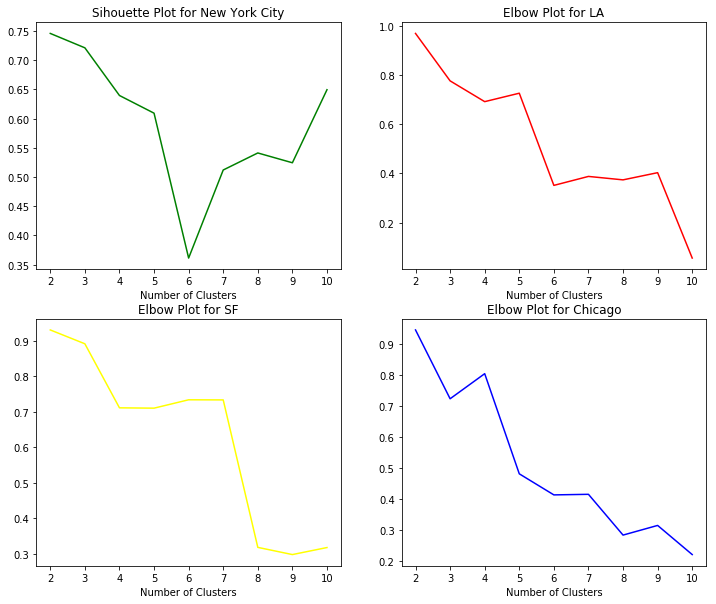

In [77]:
#plot silhouette scores

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.plot(nyc_scores,color='green')
ax1.set_title("Sihouette Plot for New York City")
ax1.set_xlabel("Number of Clusters")
ax1.set_xticklabels(labels=cluster_numbers)

ax2 = fig.add_subplot(222)
ax2.plot(la_scores,color='red')
ax2.set_title("Elbow Plot for LA")
ax2.set_xlabel("Number of Clusters")
ax2.set_xticklabels(labels=cluster_numbers)

ax3 = fig.add_subplot(223)
ax3.plot(sf_scores,color='yellow')
ax3.set_title("Elbow Plot for SF")
ax3.set_xlabel("Number of Clusters")
ax3.set_xticklabels(labels=cluster_numbers)

ax4 = fig.add_subplot(224)
ax4.plot(chic_scores,color='blue')
ax4.set_title("Elbow Plot for Chicago")
ax4.set_xlabel("Number of Clusters")
ax4.set_xticklabels(labels=cluster_numbers)

## Assign Clusters

Optimal origin cluster assignment:

NYC = 4; </br>
Chicago = 4;</br>
SF = 4;</br>
LA = 5 </br>

In [99]:
def cluster_calc(df,cluster_num):
    '''function to calculate clusters for each census tract and join back to dataframe'''
    
    cluster = KMeans(n_clusters=cluster_num,random_state=13)
    score = cluster.fit_predict(df)
    score_df = pd.DataFrame(score)
    cluster_df = df.reset_index()
    cluster_df = pd.merge(left=cluster_df,right=score_df,how='left',left_index=True,right_index=True)
    
    return cluster_df

In [103]:
#create cluster dfs for each city
nyc_origin_clusters = cluster_calc(nyc_origin_agg,4)
chic_origin_clusters = cluster_calc(chic_origin_agg,4)
sf_origin_clusters = cluster_calc(sf_origin_agg,4)
la_origin_clusters = cluster_calc(la_origin_agg,5)

In [104]:
#output cluster results to csvs
nyc_origin_clusters.to_csv('nyc_clusters.csv')
chic_origin_clusters.to_csv('chic_clusters.csv')
sf_origin_clusters.to_csv('sf_clusters.csv')
la_origin_clusters.to_csv('la_clusters.csv')